In [29]:
## Importing libraries

In [22]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y =mnist["data"],mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [32]:
some_digit = X[34578]
some_digit_image = some_digit.reshape(28,28)


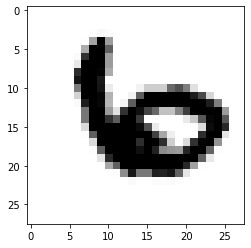

In [33]:
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [36]:
y[0]
y =y.astype(np.uint8)
y[34578]

6

In [15]:
X_train,X_test,y_train,y_test=X[0:60000],X[60000:0],y[0:60000],y[60000:0]

In [16]:
shuffle_index = np.random.permutations(60000)
X_train,y_train= X_train[shuffle_index],y_train[shuffle_index]

In [25]:
score=[]
for k in range (1,9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)
    pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))
    accuracy = accuracy_score(y_test, pred)
    score.append(accuracy)
    print("Accuracy: ",accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("\n---------------\n")
    

Accuracy:  0.9691
Confusion Matrix:
 [[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]

---------------

Accuracy:  0.9627
Confusion Matrix:
 [[ 976    1    1    0    0    1    0    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11   10  995    1    2    0    0   12    1    0]
 [   1    1    8  981    1    9    0    6    2    1]
 [   3    7    0    0  959    0    2    3    0    8]
 [   6    2    0   25    2  850    2    1    1    3]
 [   7    3    0    0    5    4  939    0    0    0]
 [   0

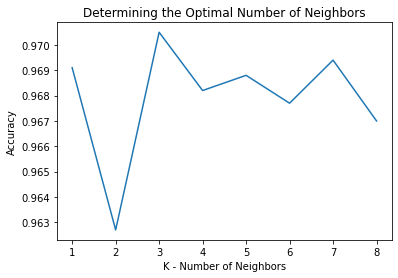

In [26]:
plt.plot(range(1,9), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [27]:
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier = classifier.fit(X.reshape(X_train.shape[0], 28*28), y)
    pred = classifier.predict(X.reshape(X_test.shape[0], 28*28))

In [28]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1008
           1       1.00      0.96      0.98      1183
           2       0.97      0.98      0.97      1014
           3       0.97      0.96      0.96      1013
           4       0.97      0.98      0.97       974
           5       0.96      0.97      0.96       889
           6       0.99      0.98      0.98       960
           7       0.96      0.96      0.96      1027
           8       0.94      0.99      0.96       924
           9       0.96      0.96      0.96      1008

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
pred = classifier.predict(X.reshape(X.shape[0], 28*28))